In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('Datasets\dataset_vcr_compact.csv')
df_antiguo = pd.read_csv('Datasets\deptos.csv')

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_14552\3441994721.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_antiguo = pd.read_csv('Datasets\deptos.csv')


### Baños

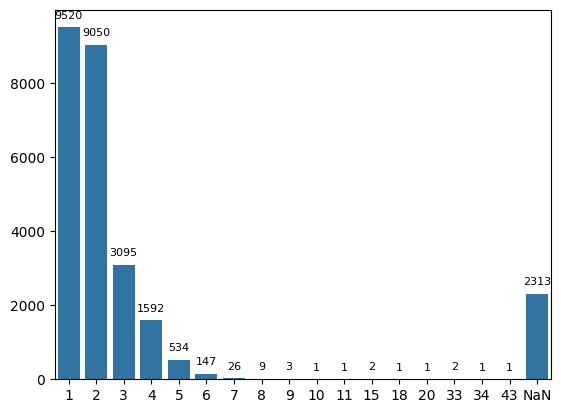

In [8]:
frecuencia_banos = df_antiguo['banos'].value_counts(dropna=False).sort_index()
x_labels = [str(int(val)) if pd.notna(val) else 'NaN' for val in frecuencia_banos.index]
sns.barplot(x=x_labels, y=frecuencia_banos.values)
for index, value in enumerate(frecuencia_banos.values):
    plt.text(index, value + (frecuencia_banos.max() * 0.02), str(value), ha='center', va='bottom', fontsize=8)

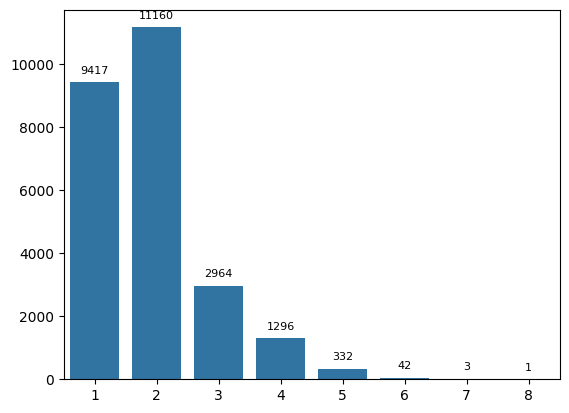

In [9]:
frecuencia_banos = df['banos'].value_counts(dropna=False).sort_index()
x_labels = [str(int(val)) if pd.notna(val) else 'NaN' for val in frecuencia_banos.index]
sns.barplot(x=x_labels, y=frecuencia_banos.values)
for index, value in enumerate(frecuencia_banos.values):
    plt.text(index, value + (frecuencia_banos.max() * 0.02), str(value), ha='center', va='bottom', fontsize=8)

### Antigüedad

In [13]:
df_antiguo['antiguedad'].nunique()

161

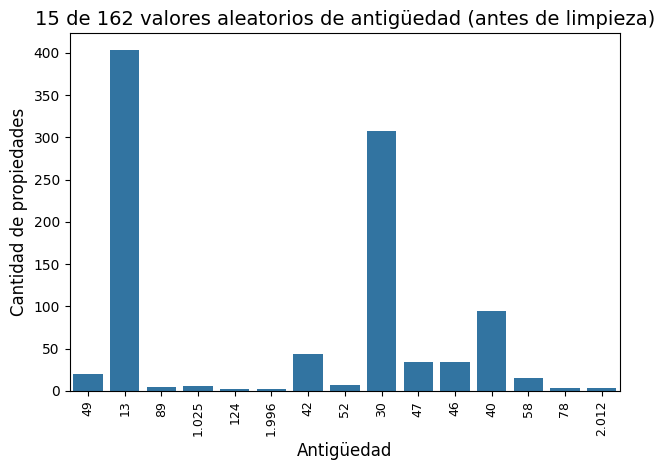

Total de categorías distintas (antes): 162


In [11]:
# Frecuencias "antes"
frecuencia_antiguedad = df_antiguo['antiguedad'].value_counts(dropna=False)

# Elegimos Top N categorías
TOP_N = 15
frecuencia_top = frecuencia_antiguedad.sample(TOP_N)

# Etiquetas del eje X, limpiando "años"
x_labels = [
    str(val).replace("años", "").strip() if pd.notna(val) else "NaN"
    for val in frecuencia_top.index
]

# Gráfico solo con el Top N
sns.barplot(x=x_labels, y=frecuencia_top.values)

plt.title(f"15 de 162 valores aleatorios de antigüedad (antes de limpieza)", fontsize=14)
plt.xlabel('Antigüedad', fontsize=12)
plt.ylabel('Cantidad de propiedades', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# Info auxiliar para el texto del informe (opcional)
total_categorias = frecuencia_antiguedad.size
coverage = frecuencia_top.sum() / frecuencia_antiguedad.sum()
print(f"Total de categorías distintas (antes): {total_categorias}")


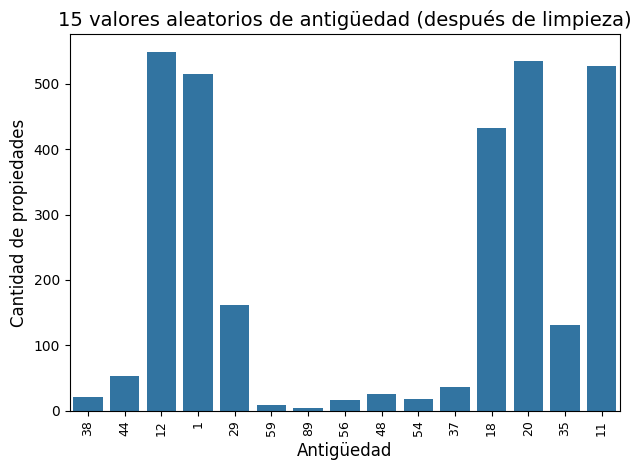

Total de categorías distintas (después): 103


In [36]:
# Frecuencias "antes"
frecuencia_antiguedad = df['antiguedad'].value_counts(dropna=False)

# Elegimos Top N categorías
TOP_N = 15
frecuencia_top = frecuencia_antiguedad.sample(TOP_N)

# Etiquetas del eje X, limpiando "años"
x_labels = [
    str(val).replace("años", "").strip() if pd.notna(val) else "NaN"
    for val in frecuencia_top.index
]

# Gráfico solo con el Top N
sns.barplot(x=x_labels, y=frecuencia_top.values)

plt.title(f"15 valores aleatorios de antigüedad (después de limpieza)", fontsize=14)
plt.xlabel('Antigüedad', fontsize=12)
plt.ylabel('Cantidad de propiedades', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# Info auxiliar para el texto del informe (opcional)
total_categorias = frecuencia_antiguedad.size
coverage = frecuencia_top.sum() / frecuencia_antiguedad.sum()
print(f"Total de categorías distintas (después): {total_categorias}")


### Dormitorios

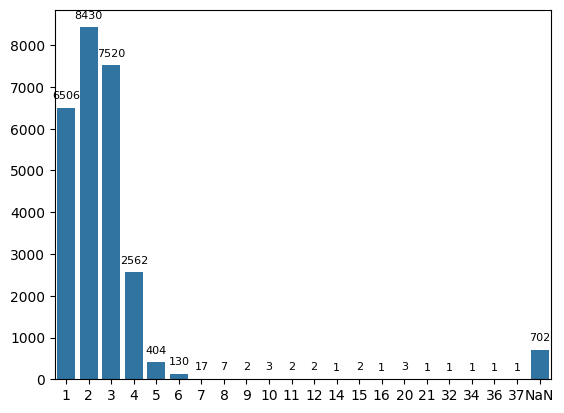

In [7]:
frecuencia_dormitorios = df_antiguo['dormitorios'].value_counts(dropna=False).sort_index()
x_labels = [str(int(val)) if pd.notna(val) else 'NaN' for val in frecuencia_dormitorios.index]
sns.barplot(x=x_labels, y=frecuencia_dormitorios.values)
for index, value in enumerate(frecuencia_dormitorios.values):
    plt.text(index, value + (frecuencia_dormitorios.max() * 0.02), str(value), ha='center', va='bottom', fontsize=8)

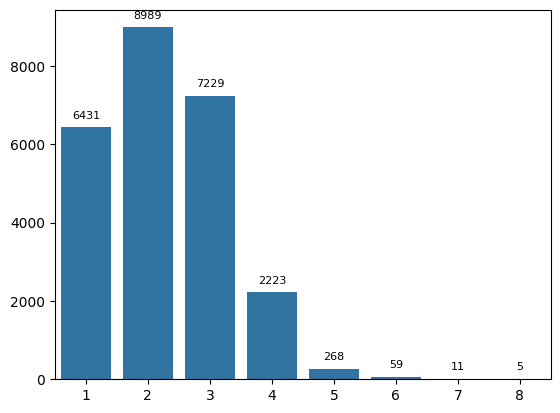

In [6]:
frecuencia_dormitorios = df['dormitorios'].value_counts(dropna=False).sort_index()
x_labels = [str(int(val)) if pd.notna(val) else 'NaN' for val in frecuencia_dormitorios.index]
sns.barplot(x=x_labels, y=frecuencia_dormitorios.values)
for index, value in enumerate(frecuencia_dormitorios.values):
    plt.text(index, value + (frecuencia_dormitorios.max() * 0.02), str(value), ha='center', va='bottom', fontsize=8)

### Orientación

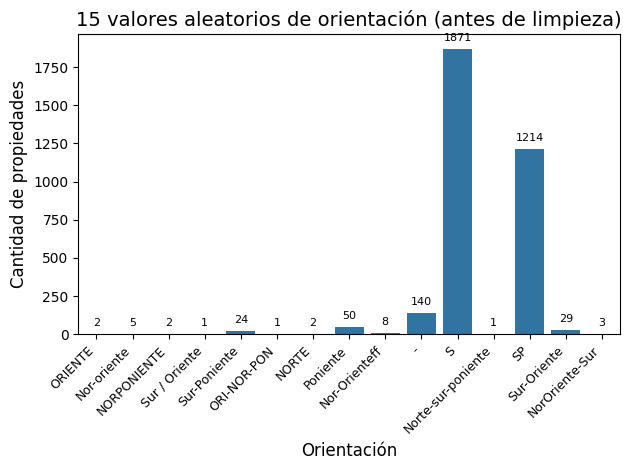

Total de categorías distintas (antes): 50


In [17]:
# Frecuencias "antes"
frecuencia_orientacion = df_antiguo['orientacion'].value_counts(dropna=False)

# Elegimos hasta 15 categorías aleatorias (o menos si no hay tantas)

frecuencia_sample = frecuencia_orientacion.sample(15)

# Gráfico con las categorías muestreadas
x_labels = [
    str(val) if pd.notna(val) else "NaN"
    for val in frecuencia_sample.index
]

sns.barplot(x=x_labels, y=frecuencia_sample.values)

plt.title(f"{n_mostrar} valores aleatorios de orientación (antes de limpieza)", fontsize=14)
plt.xlabel('Orientación', fontsize=12)
plt.ylabel('Cantidad de propiedades', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)

# Mostrar los valores encima de cada barra
for index, value in enumerate(frecuencia_sample.values):
    plt.text(
        index,
        value + (frecuencia_sample.max() * 0.02),
        str(value),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

# Info auxiliar para el texto del informe (opcional)
total_categorias = frecuencia_orientacion.size
print(f"Total de categorías distintas (antes): {total_categorias}")


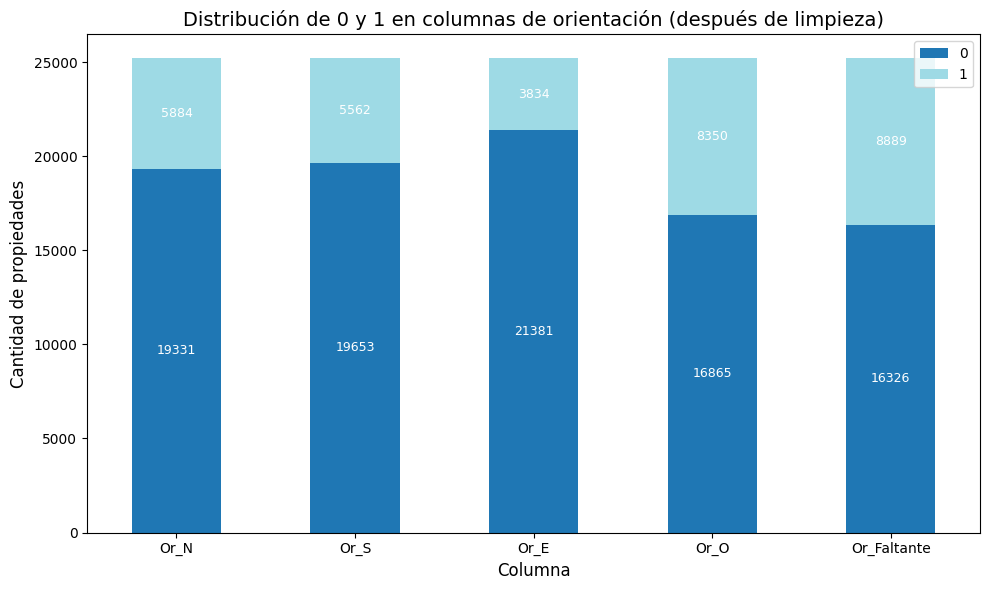

In [19]:


# Columnas a analizar
cols = ["Or_N", "Or_S", "Or_E", "Or_O", "Or_Faltante"]

# Conteo de 0s y 1s por columna
counts = {
    col: df[col].value_counts(dropna=False).reindex([0, 1], fill_value=0)
    for col in cols
}

# Crear DataFrame para facilitar graficación
counts_df = pd.DataFrame(counts).T  # columnas: 0 y 1

# Plot stacked bar chart
ax = counts_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20")

plt.title("Distribución de 0 y 1 en columnas de orientación (después de limpieza)", fontsize=14)
plt.xlabel("Columna", fontsize=12)
plt.ylabel("Cantidad de propiedades", fontsize=12)
plt.xticks(rotation=0)

# Añadir los valores dentro de las barras
for i, col in enumerate(cols):
    zero_count = counts_df.loc[col, 0]
    one_count  = counts_df.loc[col, 1]

    # Texto para 0
    ax.text(
        i, 
        zero_count / 2,   # mitad del segmento de 0
        str(zero_count),
        ha='center', va='center', fontsize=9, color="white"
    )

    # Texto para 1
    ax.text(
        i, 
        zero_count + (one_count / 2),  # encima del bloque de 0, mitad del bloque de 1
        str(one_count),
        ha='center', va='center', fontsize=9, color="white"
    )

plt.tight_layout()
plt.show()


### Estacionamiento

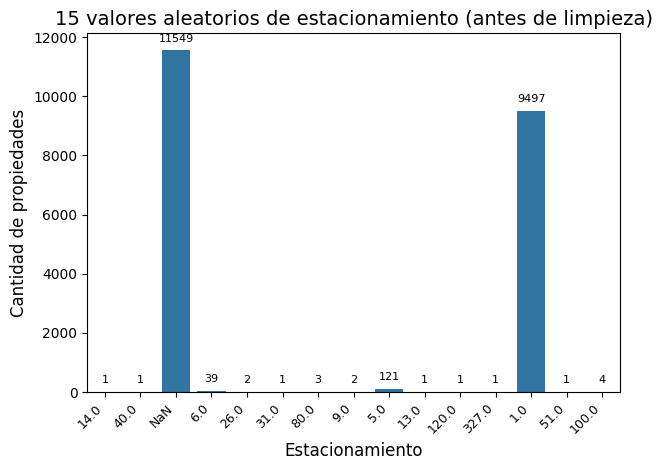

Total de categorías distintas (antes): 55


In [40]:
# Frecuencias "antes"
frecuencia_est = df_antiguo['estacionamiento'].value_counts(dropna=False)

# Elegir exactamente 15 valores aleatorios (si hay menos, toma todos)
n = min(15, len(frecuencia_est))
frecuencia_sample = frecuencia_est.sample(n, random_state=None)  # <-- sin seed para probar varias veces

# Etiquetas del eje X
x_labels = [
    str(val) if pd.notna(val) else "NaN"
    for val in frecuencia_sample.index
]

# Gráfico
sns.barplot(x=x_labels, y=frecuencia_sample.values)

plt.title(f"{n} valores aleatorios de estacionamiento (antes de limpieza)", fontsize=14)
plt.xlabel('Estacionamiento', fontsize=12)
plt.ylabel('Cantidad de propiedades', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)

# Mostrar los valores encima de cada barra
for index, value in enumerate(frecuencia_sample.values):
    plt.text(
        index,
        value + (frecuencia_sample.max() * 0.02),
        str(value),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

# Info auxiliar (opcional)
total_categorias = frecuencia_est.size
print(f"Total de categorías distintas (antes): {total_categorias}")


Text(0.5, 1.0, 'Frecuencia estacionamientos (después de limpieza)')

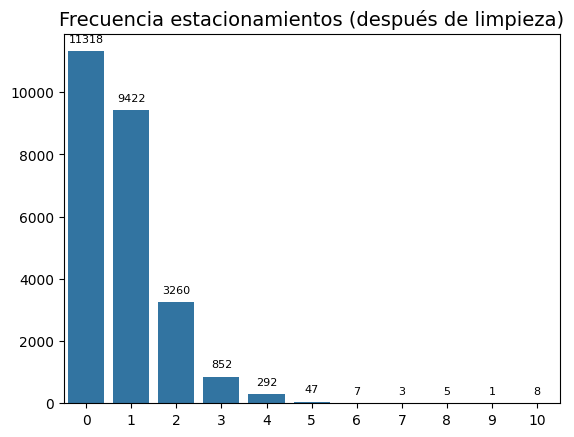

In [55]:
frecuencia_estacionamiento = df['estacionamiento'].value_counts(dropna=False).sort_index()
x_labels = [str(int(val)) if pd.notna(val) else 'NaN' for val in frecuencia_estacionamiento.index]
sns.barplot(x=x_labels, y=frecuencia_estacionamiento.values)
for index, value in enumerate(frecuencia_estacionamiento.values):
    plt.text(index, value + (frecuencia_estacionamiento.max() * 0.02), str(value), ha='center', va='bottom', fontsize=8)
plt.title(f"Frecuencia estacionamientos (después de limpieza)", fontsize=14)


### Bodegas

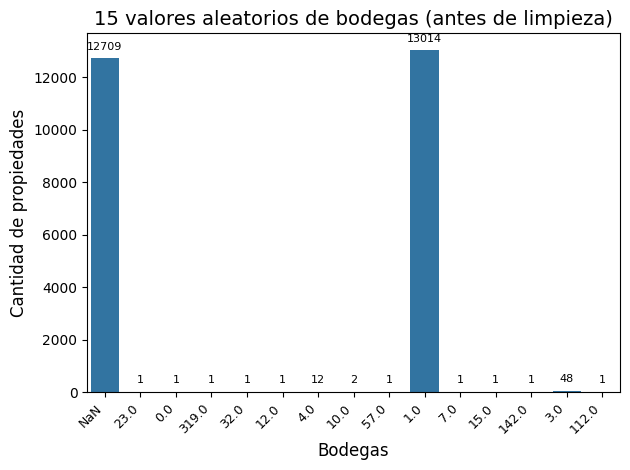

Total de categorías distintas (antes): 28


In [43]:
# Frecuencias "antes"
frecuencia_bodega = df_antiguo['bodegas'].value_counts(dropna=False)

# Elegir exactamente 15 valores aleatorios (o menos si no hay tantos)
n = min(15, len(frecuencia_bodega))
frecuencia_sample = frecuencia_bodega.sample(n, random_state=None)  # sin seed para variar

# Etiquetas del eje X
x_labels = [
    str(val) if pd.notna(val) else "NaN"
    for val in frecuencia_sample.index
]

# Gráfico
sns.barplot(x=x_labels, y=frecuencia_sample.values)

plt.title(f"{n} valores aleatorios de bodegas (antes de limpieza)", fontsize=14)
plt.xlabel('Bodegas', fontsize=12)
plt.ylabel('Cantidad de propiedades', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)

# Mostrar los valores encima de cada barra
for index, value in enumerate(frecuencia_sample.values):
    plt.text(
        index,
        value + (frecuencia_sample.max() * 0.02),
        str(value),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

# Info auxiliar (opcional)
total_categorias = frecuencia_bodega.size
print(f"Total de categorías distintas (antes): {total_categorias}")


Text(0.5, 1.0, 'Frecuencia bodegas (después de limpieza)')

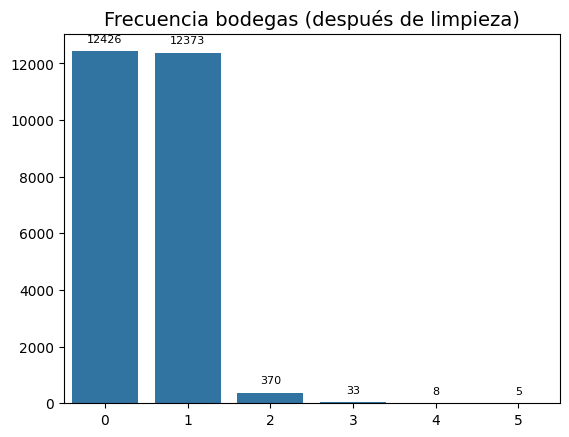

In [54]:
frecuencia_bodega = df['bodegas'].value_counts(dropna=False).sort_index()
x_labels = [str(int(val)) if pd.notna(val) else 'NaN' for val in frecuencia_bodega.index]
sns.barplot(x=x_labels, y=frecuencia_bodega.values)
for index, value in enumerate(frecuencia_bodega.values):
    plt.text(index, value + (frecuencia_bodega.max() * 0.02), str(value), ha='center', va='bottom', fontsize=8)
plt.title(f"Frecuencia bodegas (después de limpieza)", fontsize=14)


### Terraza

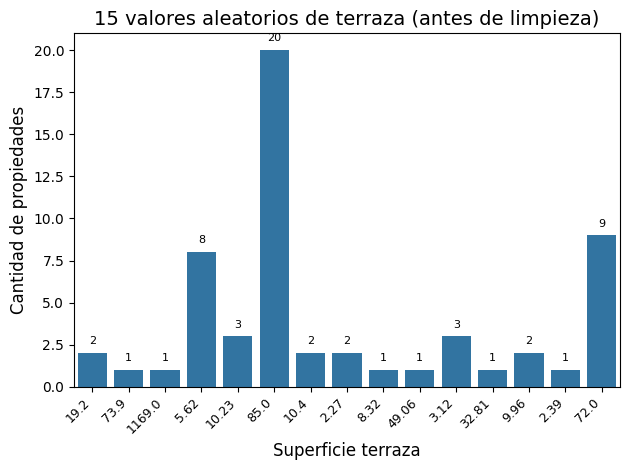

Total de categorías distintas (antes): 1210


In [46]:
# Frecuencias "antes"
frecuencia_terraza = df_antiguo['terraza'].value_counts(dropna=False)

# Elegir 15 valores aleatorios (o menos si no hay tantos)
n = min(15, len(frecuencia_terraza))
frecuencia_sample = frecuencia_terraza.sample(n, random_state=None)  # sin seed para probar varias veces

# Etiquetas del eje X
x_labels = [
    str(val) if pd.notna(val) else "NaN"
    for val in frecuencia_sample.index
]

# Gráfico
sns.barplot(x=x_labels, y=frecuencia_sample.values)

plt.title(f"{n} valores aleatorios de terraza (antes de limpieza)", fontsize=14)
plt.xlabel('Superficie terraza', fontsize=12)
plt.ylabel('Cantidad de propiedades', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)

# Mostrar los valores encima de cada barra
for index, value in enumerate(frecuencia_sample.values):
    plt.text(
        index,
        value + (frecuencia_sample.max() * 0.02),
        str(value),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

# Info auxiliar (opcional)
total_categorias = frecuencia_terraza.size
print(f"Total de categorías distintas (antes): {total_categorias}")


In [50]:
col_target = "terraza" 
# Centro aproximado de Santiago de Chile 
centro_santiago = [-33.45, -70.66]

# Crear el mapa
mapa = folium.Map(location=centro_santiago, zoom_start=12)

# Agregar los deptos al mapa
for _, row in df_antiguo.iterrows():
    valor = row[col_target]
    
    # Color según tenga o no NaN en la columna objetivo
    if pd.isna(valor):
        color = 'purple'   # departamentos con NaN
    else:
        color = 'green'    # departamentos sin NaN
    
    folium.CircleMarker(
        location=[row["latitud"], row["longitud"]],
        radius=1,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
    ).add_to(mapa)

# Guardar el mapa
mapa_path = "mapa_santiago_deptos_nan.html"
mapa.save(mapa_path)
print(f"Mapa guardado en: {mapa_path}")


Mapa guardado en: mapa_santiago_deptos_nan.html


### tipo_depto

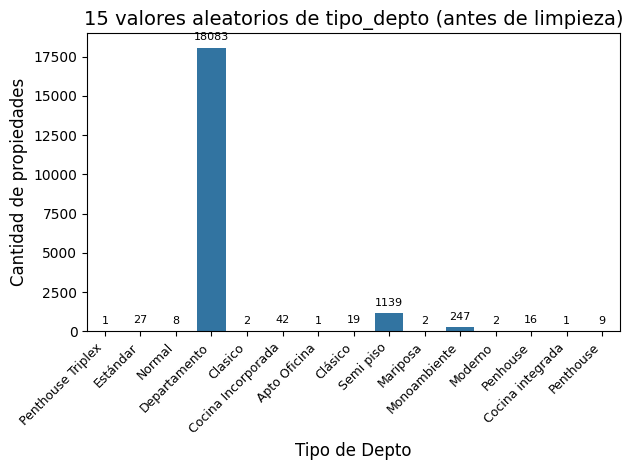

Total de categorías distintas (antes): 28


In [56]:
# Frecuencias "antes"
frecuencia_tipo = df_antiguo['tipo_depto'].value_counts(dropna=False)

# Elegir 15 valores aleatorios (o menos si no hay tantos)
n = min(15, len(frecuencia_tipo))
frecuencia_sample = frecuencia_tipo.sample(n, random_state=None)  # sin seed para variar cada ejecución

# Etiquetas del eje X
x_labels = [
    str(val) if pd.notna(val) else "NaN"
    for val in frecuencia_sample.index
]

# Gráfico
sns.barplot(x=x_labels, y=frecuencia_sample.values)

plt.title(f"{n} valores aleatorios de tipo_depto (antes de limpieza)", fontsize=14)
plt.xlabel('Tipo de Depto', fontsize=12)
plt.ylabel('Cantidad de propiedades', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)

# Mostrar los valores encima de cada barra
for index, value in enumerate(frecuencia_sample.values):
    plt.text(
        index,
        value + (frecuencia_sample.max() * 0.02),
        str(value),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

# Info auxiliar (opcional)
total_categorias = frecuencia_tipo.size
print(f"Total de categorías distintas (antes): {total_categorias}")


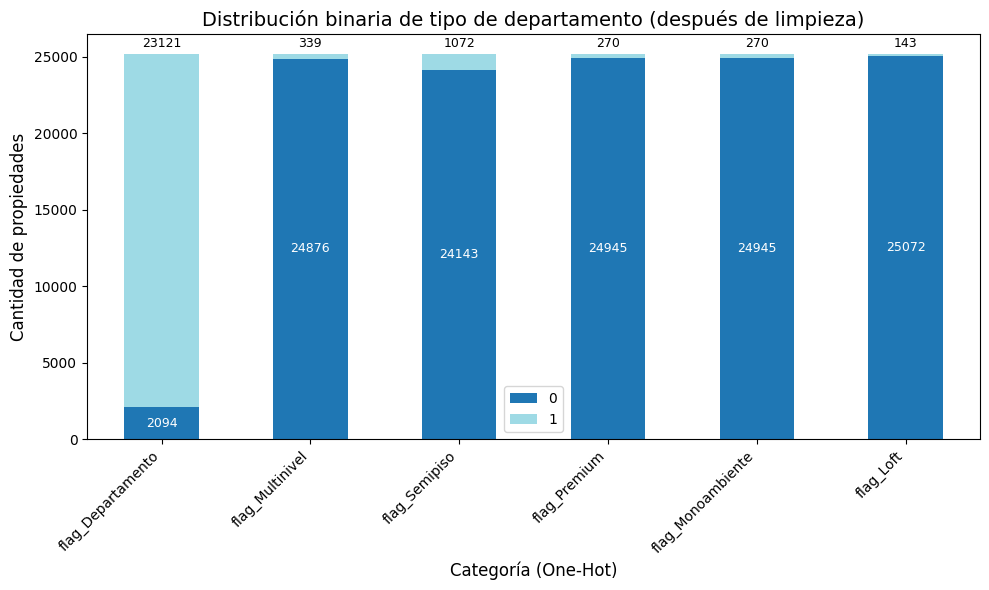

In [60]:
# Columnas one-hot de tipo de departamento
cols = [
    "flag_Departamento",
    "flag_Multinivel",
    "flag_Semipiso",
    "flag_Premium",
    "flag_Monoambiente",
    "flag_Loft"
]

# Conteo de 0s y 1s por columna
counts = {
    col: df[col].value_counts(dropna=False).reindex([0, 1], fill_value=0)
    for col in cols
}

# Crear DataFrame para graficación
counts_df = pd.DataFrame(counts).T  # columnas = 0 y 1

# Gráfico de barras apiladas
ax = counts_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="tab20"
)

plt.title("Distribución binaria de tipo de departamento (después de limpieza)", fontsize=14)
plt.xlabel("Categoría (One-Hot)", fontsize=12)
plt.ylabel("Cantidad de propiedades", fontsize=12)
plt.xticks(rotation=45, ha='right')



# Agregar los valores a cada barra
for i, col in enumerate(cols):
    zero_count = counts_df.loc[col, 0]
    one_count  = counts_df.loc[col, 1]

    # Texto dentro del bloque "0" (en blanco)
    ax.text(
        i,
        zero_count / 2,
        str(zero_count),
        ha='center', va='center',
        fontsize=9, color="white"
    )

    # Texto PARA EL BLOQUE "1" → arriba de la barra (en negro)
    ax.text(
        i,
        zero_count + one_count + (counts_df.values.max() * 0.01),
        str(one_count),
        ha='center', va='bottom',
        fontsize=9, color="black"
    )

plt.tight_layout()
plt.show()
